Trying to visualize how the energy measured in a given front strip changes with the index of the corresponding back strip.
Previous analysis was made from the wrong calibrations which is why decreprencies appear. 

The script is not up to date but can be easily made so!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import matplotlib as mpl
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
datapath = "/../../data/"
curdir = os.getcwd()


In [2]:
os.chdir(curdir+datapath)
files = ["045_000m.root", "046_000m.root", "047_000m.root", "047_001m.root", "048_000m.root", "048_001m.root" \
    ,"049_000m.root", "049_001m.root", "050_000m.root", "051_000m.root", "051_001m.root", "052_000m.root", "055_000m.root" \
        , "055_001m.root", "057_000m.root", "057_001m.root", "057_002m.root", "057_003m.root", "058_000m.root" \
            , "058_001m.root", "058_002m.root", "059_000m.root", "061_000m.root", "063_000m.root", "063_001m.root" \
                , "063_002m.root", "064_000m.root", "064_001m.root", "064_002m.root", "064_003m.root", "064_004m.root" \
                    ,"065_000m.root", "066_000m.root", "067_000m.root", "068_000m.root", "068_001m.root", "069_000m.root" \
                        , "070_000m.root", "070_001m.root", "071_000m.root", "072_000m.root", "072_001m.root" \
                            , "073_000m.root", "073_001m.root", "073_002m.root", "073_003m.root" \
                                , "074_000m.root", "074_001m.root", "074_002m.root"]


r = 0
dum = 0

Fs = [[] for _ in range(16)]
Bis = [[] for _ in range(16)]
Bs = [[] for _ in range(16)]

for f in files:
    r = uproot.open(f)["a101"]
    dum = r.arrays(["id", "FI", "BI", "FE", "BE"])
    ids = ak.flatten(dum.id)
    FEs = ak.flatten(dum.FE)
    BEs = ak.flatten(dum.BE)
    FIs = ak.flatten(dum.FI)
    BIs = ak.flatten(dum.BI)
    mask = (ids == 2) ## choose to only look at id==2 um 55 
    ids = ids[mask]
    FEs = FEs[mask]
    BEs = BEs[mask]
    FIs = FIs[mask]
    BIs = BIs[mask]
    for i in range(1,17) :
        mask = (FIs == i) & (FEs>1100) & (FEs<1400)
        f_FEs = FEs[mask]
        f_BEs = BEs[mask]
        bis = BIs[mask]
        Bis[i-1].extend(bis)
        Fs[i-1].extend(f_FEs)
        Bs[i-1].extend(f_BEs)
    print("file ", f, " processed")
    if f==files[-1]:
        print("Done!")
os.chdir(curdir)

file  045_000m.root  processed
file  046_000m.root  processed
file  047_000m.root  processed
file  047_001m.root  processed
file  048_000m.root  processed
file  048_001m.root  processed
file  049_000m.root  processed
file  049_001m.root  processed
file  050_000m.root  processed
file  051_000m.root  processed
file  051_001m.root  processed
file  052_000m.root  processed
file  055_000m.root  processed
file  055_001m.root  processed
file  057_000m.root  processed
file  057_001m.root  processed
file  057_002m.root  processed
file  057_003m.root  processed
file  058_000m.root  processed
file  058_001m.root  processed
file  058_002m.root  processed
file  059_000m.root  processed
file  061_000m.root  processed
file  063_000m.root  processed
file  063_001m.root  processed
file  063_002m.root  processed
file  064_000m.root  processed
file  064_001m.root  processed
file  064_002m.root  processed
file  064_003m.root  processed
file  064_004m.root  processed
file  065_000m.root  processed
file  06

1268.2701432679355


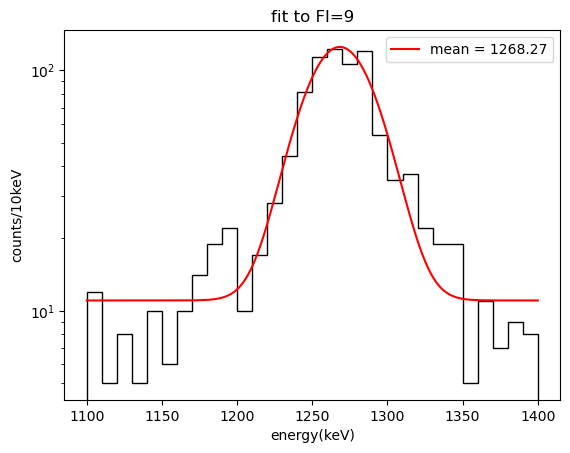

In [3]:
#Plotting mean value for FI=1 and checking fit
####################
Es = np.array(Fs[9])
bin_width = 10 # keV
bins = np.arange(1100, 1400 + bin_width, bin_width)
plt.hist(Es, bins=bins, histtype='step', color='k')
plt.yscale('log')
plt.title('fit to FI=9')
plt.xlabel('energy(keV)')
plt.ylabel('counts/10keV')
counts, bin_edges = np.histogram(Es, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
# Define Gaussian with Offset
def gauss(x, A, mu, sigma, B):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + B

p0 = [max(counts), np.mean(Es), np.std(Es), min(counts)]  

# Fit the Gaussian with Offset
popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0)

# Extract fitted parameters
A_fit, mu_fit, sigma_fit, B_fit = popt

# Generate Gaussian Fit Curve
x_fit = np.linspace(1100, 1400, 1000)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label=f'mean = {np.round(popt[1],2)}')
plt.legend()
print(popt[1])
####################

#Calculating mean energy for all FI's which gives an array of 16 mean energies
####################
Fmeans = []
Fmeans_errs = []
Fstrips = [_ for _ in range(1,17)]
for i in range(0,16):
    es = np.array(Fs[i])
    i_counts, i_bin_edges = np.histogram(es, bins=bins)
    i_bin_centers = (i_bin_edges[:-1] + i_bin_edges[1:]) / 2 
    i_p0 = [max(i_counts), np.mean(es), np.std(es), min(i_counts)]  
    i_popt, _ = curve_fit(gauss, i_bin_centers, i_counts, p0=i_p0)
    i_A_fit, i_mu_fit, i_sigma_fit, i_B_fit = i_popt
    Fmeans.append(i_mu_fit)
    Fmeans_errs.append(i_sigma_fit)


1227.497542149633


Text(0, 0.5, 'counts/10keV')

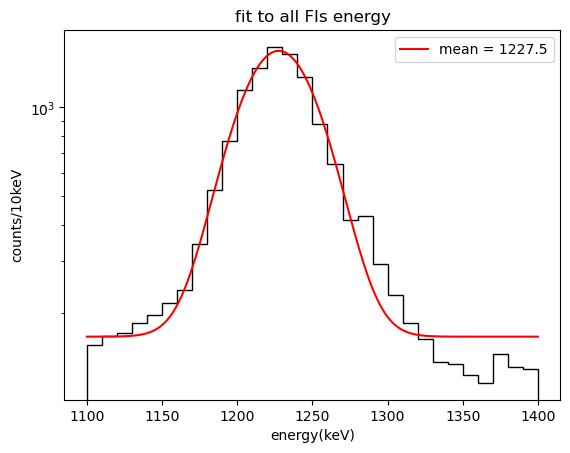

In [4]:
##### should find gauss fit for all FEs aswell
es = [i for f in Fs for i in f]
es=np.array(es)
bin_width = 10 # keV
bins = np.arange(1100, 1400 + bin_width, bin_width)
plt.hist(es, bins=bins, histtype='step', color='k')
plt.yscale('log')
counts, bin_edges = np.histogram(es, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
def gauss(x, A, mu, sigma, B):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + B

p0 = [max(counts), np.mean(Es), np.std(Es), min(counts)]  
popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0)
A_fit, mu_fit, sigma_fit, B_fit = popt
x_fit = np.linspace(1100, 1400, 1000)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label=f'mean = {np.round(popt[1],2)}')
print(popt[1])
plt.yscale('log')
plt.legend()
plt.title('fit to all FIs energy')
plt.xlabel('energy(keV)')
plt.ylabel('counts/10keV')


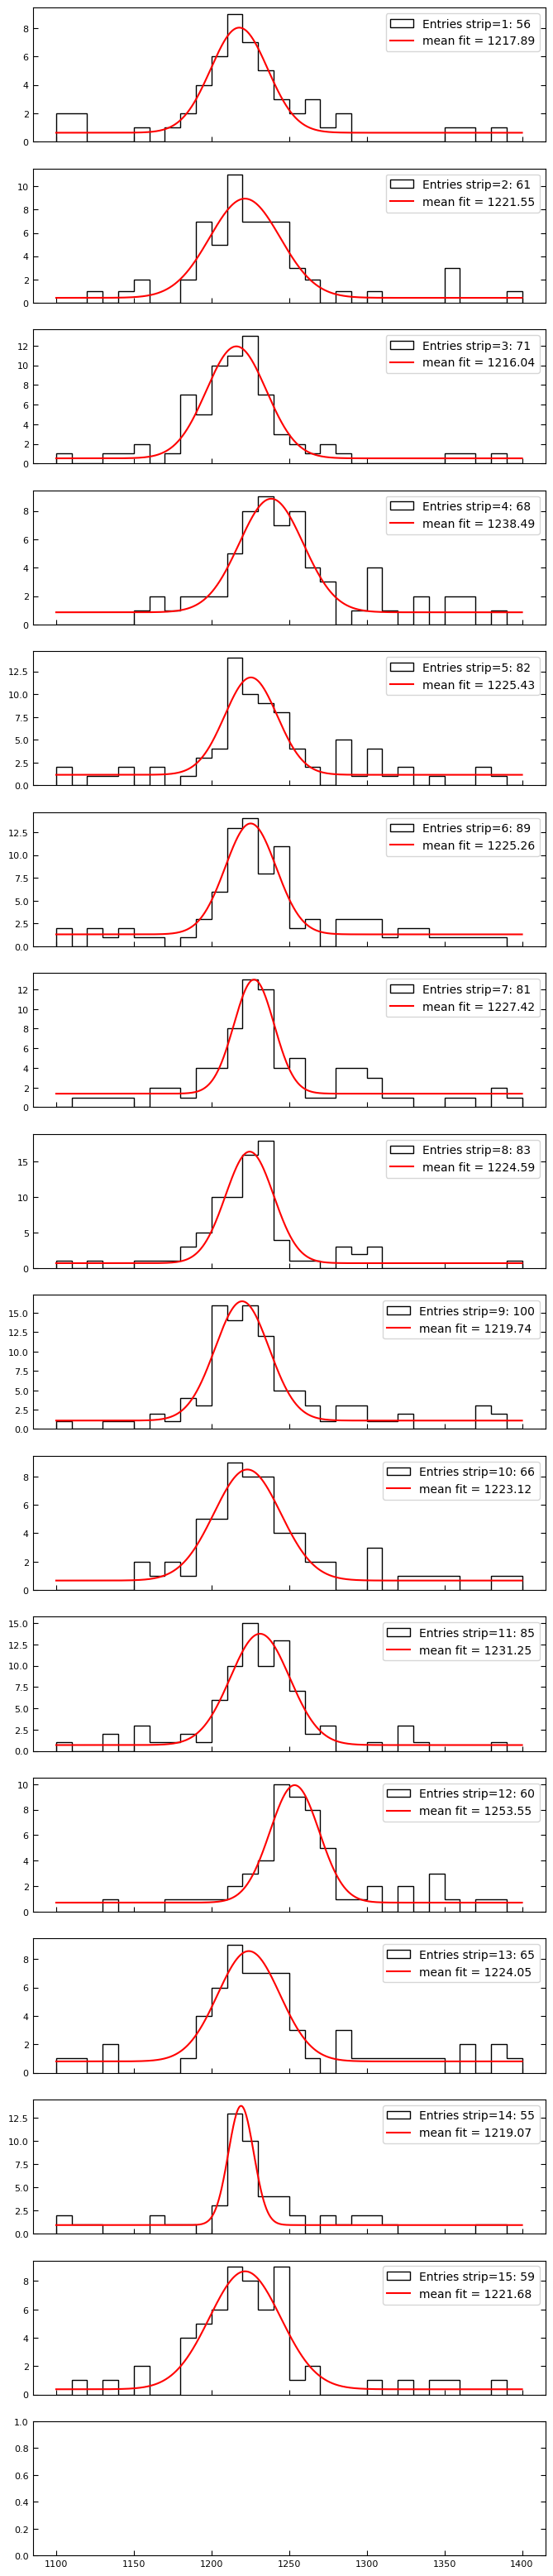

In [9]:

#Plot and fits of FI=1 and all BI's which gives 16 plots and their mean values are found
####################
fig, axs = plt.subplots(16,1, figsize=(8,40), sharex=True)
bin_width = 10 # keV
bins = np.arange(1100, 1400 + bin_width, bin_width)
means = []
#""""
for (ax,i) in zip(axs, range(1, 16)):
    mask = (np.array(Bis[7]) == i)
    bs = np.array(Bs[7])[mask]
    ax.hist(bs, bins=bins, histtype='step', color='k', label=f"Entries strip={i}: {len(bs)}")
    counts, bin_edges = np.histogram(bs, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
    p0 = [max(counts), np.mean(bs), np.std(bs), min(counts)]  

    # Fit the Gaussian with Offset
    popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0)

    # Extract fitted parameters
    A_fit, mu_fit, sigma_fit, B_fit = popt

    # Generate Gaussian Fit Curve
    x_fit = np.linspace(1100, 1400, 1000)
    y_fit = gauss(x_fit, *popt)
    ax.plot(x_fit, y_fit, 'r-', label=f"mean fit = {np.round(popt[1], 2)}")
    means.append(popt[1])
    ax.legend(loc='upper right')

    #"""


In [6]:
### Mean values found for all FI and BI matchings in this loop
#Fstripmeans holds all the front strip mean values in an enumerated array   

bin_width = 10 # keV
bins = np.arange(1100, 1400 + bin_width, bin_width)

Bstrips = [_ for _ in range(1,16)]
Bismeans = [[] for _ in range(16)]
Bismeans_errs = [[] for _ in range(16)]
for i in range(0,16): # for index i in the front strips
    for j in range(1,16): # loop over all the BI indices for one of the front strips, i know strip 16 is dead 
        mask = (np.array(Bis[i]) == j) # when is the i'th entry in Bis equal to j? i index denotes FI j enotes BI
        bs = np.array(Bs[i])[mask]
        counts, bin_edges = np.histogram(bs, bins=bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
        p0 = [max(counts), np.mean(bs), np.std(bs), min(counts)]  
        popti, _ = curve_fit(gauss, bin_centers, counts, p0=p0)
        A, mu, sigma, B = popti
        Bismeans[i].append(mu)
        Bismeans_errs[i].append(sigma)


mean value energy is  1225.1733825811493


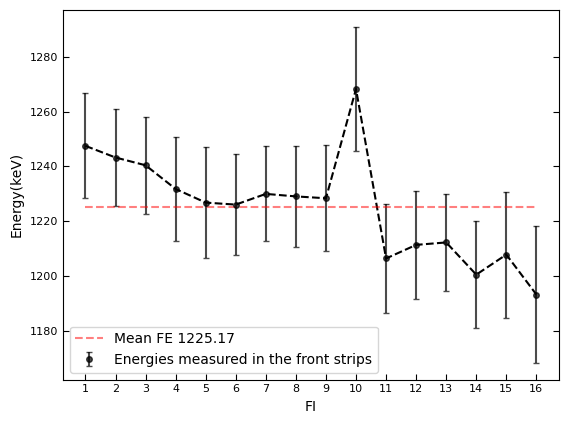

In [7]:
#### plot of the mean values found of the front energy for the specfic strips

plt.rc("xtick", labelsize=8, top=False, direction="in")
plt.rc("xtick.major", size=4)
plt.rc("xtick.minor", size=2)
plt.rc("ytick", labelsize=8, right=True, direction="in")
plt.rc("ytick.major", size=4)
plt.rc("ytick.minor", size=2)

plt.plot(Fstrips, Fmeans, ls='--', color='k')
plt.errorbar(Fstrips, Fmeans, Fmeans_errs, ls='', color='k', marker='o', markersize=4,alpha=0.7, capsize=2, label='Energies measured in the front strips')
plt.hlines(sum(Fmeans)/16, 1, 16, ls='--', color='r', alpha=0.5, label=f'Mean FE {np.round(sum(Fmeans)/16,2)}')
plt.xlabel("FI")
plt.ylabel("Energy(keV)")
plt.xticks(np.arange(1, 17, 1))
plt.legend()
print("mean value energy is ", sum(Fmeans)/16)


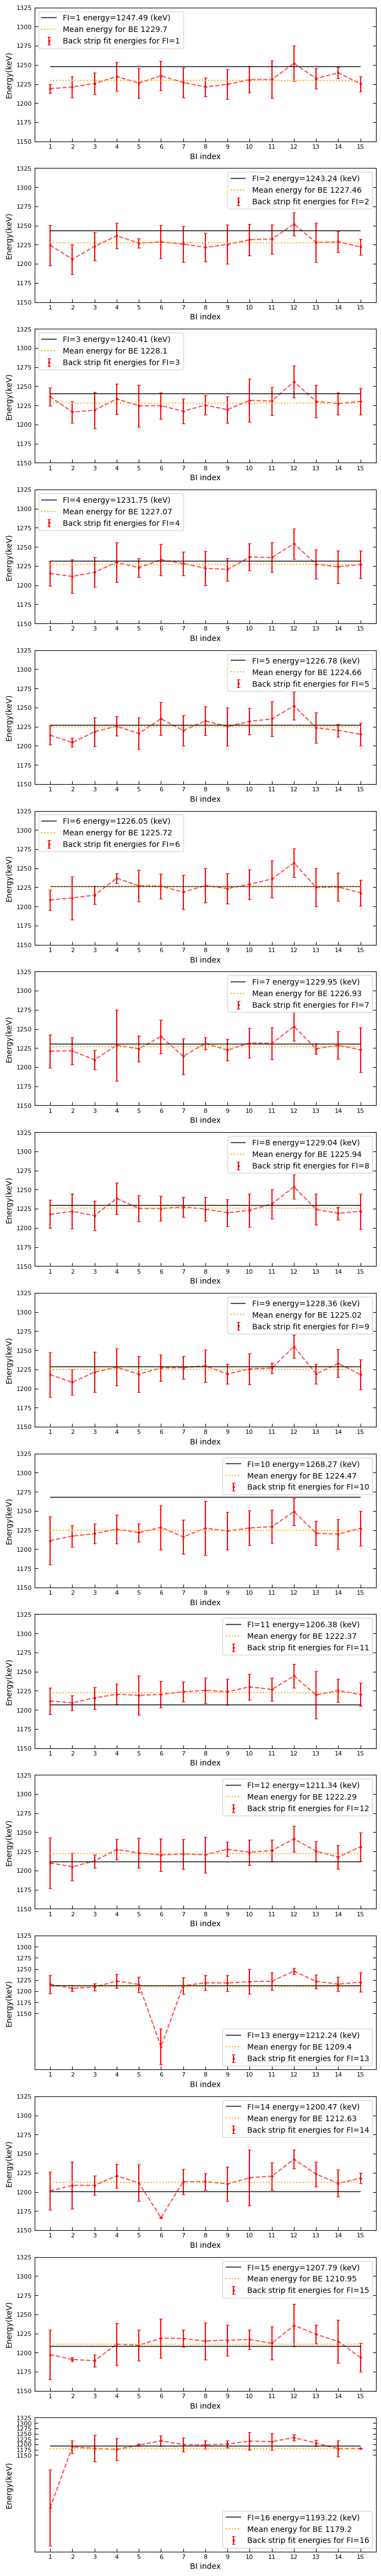

In [8]:
# i got the following 3 values Bismeans, Fstrips, Fmeans
# Plot of the evolution of the energy measured in the back indexes for a specific front index

fig, axs = plt.subplots(16, 1, figsize=(8,60))

for (ax, i) in zip(axs, range(0,16)):
    ax.plot(Bstrips, Bismeans[i], ls='--', color='r', alpha=0.7)
    ax.errorbar(Bstrips, Bismeans[i], Bismeans_errs[i], ls='', marker='o', markersize=2, capsize=2, color='r', label=f'Back strip fit energies for FI={i+1}')
    ax.hlines(Fmeans[i], 1, 15, ls='-', color='k', alpha=0.7, label=f'FI={i+1} energy={np.round(Fmeans[i], 2)} (keV)')
    ax.hlines(sum(Bismeans[i])/15, 1, 15, ls=':', color='orange', alpha=1, label=f'Mean energy for BE {np.round(sum(Bismeans[i])/15,2)}')
    ax.legend()
    ax.set_xlabel("BI index")
    ax.set_ylabel("Energy(keV)")
    ax.set_yticks(np.arange(1150, 1350, 25))
    ax.set_xticks(np.arange(1, 16, 1))
